# Funciones de distribución de probabilidad

## Distribución Uniforme
Todos tienen la misma probabilidad dentro de la distribución. <B>EQUIPROBABLES!</B>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
a = 1        # Número de inicio del rango
b = 100      # Número de fin del rango
n = 1000000  # Número de muestras que se generarán
data = np.random.uniform(a,b,n)    # Con UNIFORM de numpy se genera con distro uniforme. 

(array([ 99793., 100073.,  99856., 100260., 100192.,  99285., 100061.,
         99522., 100077., 100881.]),
 array([ 1.00016749, 10.90015061, 20.80013374, 30.70011686, 40.60009998,
        50.5000831 , 60.40006622, 70.30004934, 80.20003247, 90.10001559,
        99.99999871]),
 <a list of 10 Patch objects>)

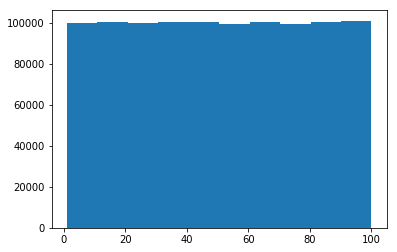

In [4]:
%matplotlib inline
plt.hist(data)

# Se puede observar que para cada número, existe casi una misma probabidad de generarse que es 100/1000000
# Según la teoría el gŕafico es un rectángulo. 

## Distribución NORMAL (Campana de Gauss)

Los parámetros que definen a una distro normal son la MEDIA y la DESVIACIÓN ESTÁNDAR. La gráfica es mucho más diciente. 

* Está la normal estándar donde la media da en 0 y la desviación crece por unidad.
* Otra normal donde la media no es en cero y la desviación no es uno. 


In [5]:
data = np.random.randn(1000000) # RANDN es la función de numpy para generar bajo la distro Normal OJO, ESTANDAR

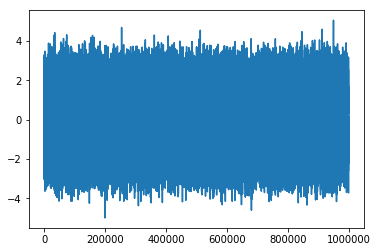

In [6]:
x = range(1, 1000001)
plt.plot(x, data)

(array([3.80000e+01, 1.36700e+03, 2.22280e+04, 1.39259e+05, 3.46565e+05,
        3.38485e+05, 1.31029e+05, 1.99050e+04, 1.10400e+03, 2.00000e+01]),
 array([-4.99986226, -3.9953718 , -2.99088135, -1.98639089, -0.98190043,
         0.02259003,  1.02708049,  2.03157094,  3.0360614 ,  4.04055186,
         5.04504232]),
 <a list of 10 Patch objects>)

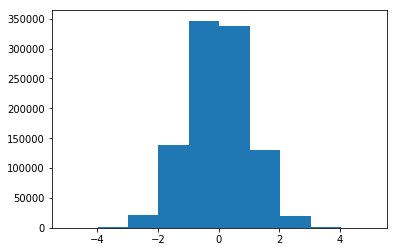

In [7]:
%matplotlib inline
plt.hist(data)  # Realizando el histograma se puede ver a groso modo la intención de la distro. 

Pero también se puede ver a través de la función de distribución acumulada. (Una S acostada para Gauss)
Esto se logra dibujando los datos ordenados de la siguiente manera: 


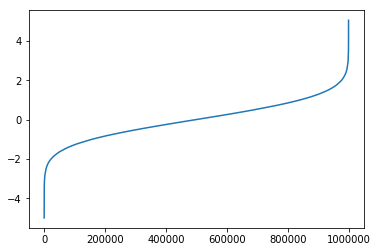

In [9]:
# Esta es la función de distribución acomulada para Gauss
plt.plot(x, sorted(data))

(array([  27.,  152.,  698., 1651., 2746., 2530., 1487.,  541.,  145.,
          23.]),
 array([-3.39721009, -1.59054545,  0.21611919,  2.02278382,  3.82944846,
         5.6361131 ,  7.44277774,  9.24944237, 11.05610701, 12.86277165,
        14.66943629]),
 <a list of 10 Patch objects>)

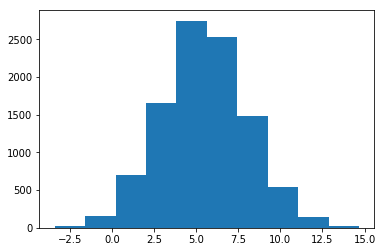

In [11]:
# para generar una distribución Normal NO estandar es de la siguiente manera: 

media = 5.5  # Basándonos en el ejemplo de las notas de una clase
desviacion_estandar =  2.5 

data= 5.5 + 2.5*np.random.randn(10000) # SE HACE DE ESTA MANERA!  y sale de  Z = (X-m)/sd  -> N(0,1) 
# despejando a X, entonces X = m + sd * Z 

plt.hist(data)  #verificar que la media es 5.5

In [12]:
# usando esto se pueden generar data frames aleatorios bajo una distribución de la siguiente manera: 
data = np.random.randn(2,4)  # 2 array de tamaño 4 con distro NORMAL. 
data

array([[-1.19582159, -2.28920044,  1.63596168, -0.11433348],
       [ 0.15490369,  0.00685791,  1.79338767, -0.95637318]])

## La simulación de Monte Carlo 
Método de Jhon Von Newman para simular el cálculo del valor exacto de PI en este caso a través del muestreo aleatorio.

Para realizar el experimiento hacemos lo siguiente: 

* Generamos dos número aleatorios uniformes <b>x</b> e <b>y</b> y entre <b>0</b> y <b>1</b> (Hay que aclarar que es entre 0 y 1 para trabajar con un cuadrante) (Estos números serían las coordenadas) en total 1000 veces. 
* Calcularemos <b> x^2 + y^2</b>

* Si el valor es inferior a 1  -> estamos dentro del círculo 
* Si el valor es superior a 1 -> estamos fuera del círculo 

* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo. 
* Usamos dicha probabilidad para aproximar el valor de π (Pi). 
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (1000), paulatinamente diferentes aproximaciones de pi, π.

* Calculamos el promedio de los 1000 anteriores para dar un valor final de π pi. 


In [19]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()

        for j in range(n): 
            z = np.sqrt(x[j]**2 + y[j]**2)
            if z <= 1:
                value += 1

        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1399619999999993


(3.1399619999999993, [<matplotlib.lines.Line2D at 0x96c1710>])

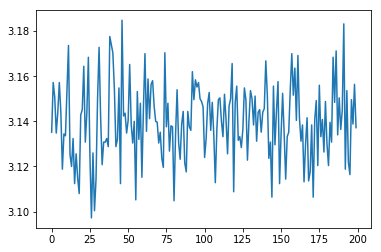

In [21]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [34]:
tamaño = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(tamaño), 
        'B': 1.5 + 2.5 * np.random.randn(tamaño), 
        'C': np.random.uniform(5,32,tamaño)
    }
)

In [35]:
data.describe() # vemos que tenemos un dummy data set con tres columnas con distribuciones con los datos deseados. 
                #Fijarse en las medias y error estándar de A y B y la C la media es el valor central entre 5 y 32 (18.5).

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001597,1.498302,18.499014
std,0.998583,2.501944,7.796611
min,-5.293512,-10.740800,5.000037
25%,-0.676798,-0.192201,11.756199
50%,-0.000022,1.501033,18.497290
75%,0.672228,3.185520,25.247821
max,5.021332,14.018660,32.000000


(array([1.20000e+01, 6.14000e+02, 1.32920e+04, 1.07724e+05, 3.24379e+05,
        3.69306e+05, 1.58026e+05, 2.51640e+04, 1.46200e+03, 2.10000e+01]),
 array([-5.29351233, -4.26202787, -3.23054341, -2.19905894, -1.16757448,
        -0.13609002,  0.89539444,  1.9268789 ,  2.95836337,  3.98984783,
         5.02133229]),
 <a list of 10 Patch objects>)

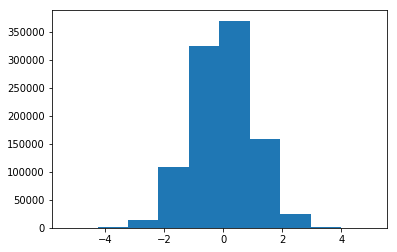

In [37]:
plt.hist(data["A"])  # Ver la distribución que es normal. 

(array([5.60000e+01, 1.72500e+03, 2.52540e+04, 1.48282e+05, 3.46915e+05,
        3.29983e+05, 1.26800e+05, 1.97510e+04, 1.19800e+03, 3.60000e+01]),
 array([-10.74080035,  -8.26485427,  -5.7889082 ,  -3.31296212,
         -0.83701604,   1.63893003,   4.11487611,   6.59082219,
          9.06676826,  11.54271434,  14.01866042]),
 <a list of 10 Patch objects>)

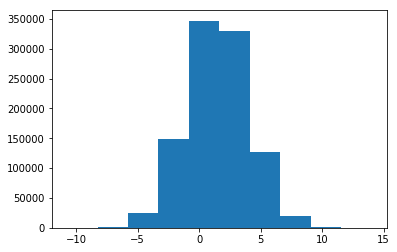

In [38]:
plt.hist(data["B"])  # Ver la distribución que es normal pero más ancha 

(array([100091.,  99584., 100360., 100341.,  99728., 100044., 100039.,
         99659.,  99712., 100442.]),
 array([ 5.00003744,  7.70003369, 10.40002994, 13.10002619, 15.80002245,
        18.5000187 , 21.20001495, 23.9000112 , 26.60000745, 29.30000371,
        31.99999996]),
 <a list of 10 Patch objects>)

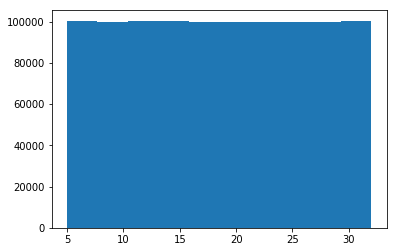

In [39]:
plt.hist(data["C"])  # Ver la distribución que es uniforme

In [44]:
#También puedo crear dummys con valores categóricas de la siguiente manera: 
data =  pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [45]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [46]:
columns_names = data.columns.values.tolist()

In [47]:
a = len(columns_names); a  # Traemos el valor del tamaño de las columnas para generar un nuevo dummy data set

21

In [51]:
new_data = pd.DataFrame (
    {
        'Column Name': columns_names, 
        'A' : np.random.randn(a), 
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42+a)  #acá vemos que también se puede modificar el index de un dummy data set, OJO con la longitud

)

In [53]:
new_data.head()  # Se verifica que tiene variables categóricas y que empieza desde el index que queremos, en este caso el 42

,Column Name,A,B
42,State,1.336166,0.164456
43,Account Length,-1.956661,0.135948
44,Area Code,0.135766,0.926158
45,Phone,-0.001200,0.287225
46,Int'l Plan,-0.797997,0.520311
